<img src = 'IMG/logo.png' ></img>

# Goal:
Develope a machine learning model to predict whether a Free Plan user would convert to a paid subscriber or not.

# Outline:
* Importing Libraries & Dataset.
* Data Pre-Processing
    * Spliting data into training and testing sets
    * Applying Oversampling to Minority Class & Undersampling to Majority Class
    * Applying Feature scaling
    * Applying dimensionality Reduction (PCA) and removing features that might not contribute to the model’s performance.

* Model Trainig & Evaluation
    * Apply a hyperparameter tuning technique using grid search.
    * discuss relevant metrics such as accuracy, precision, recall, F1 score, confusion matrix.

## Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import os
import re
from IPython.display import display,HTML
import seaborn as sns
import matplotlib.pyplot as plt
from ASSETS.assets import plot_learning_curve

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(f'DATA/ml.xlsx')
df.head()

,student_id,student_country,minutes_watched,hub_question,engagement_quizzes,engagement_exams,engagement_lessons,subscribed
0,258798,IN,0.3,0,0,0,1,0
1,258799,CO,0.0,0,0,0,0,0
2,258800,CA,234.0,0,5,3,8,1
3,258801,IN,0.0,0,0,0,0,0
4,258802,US,0.0,0,0,0,0,0


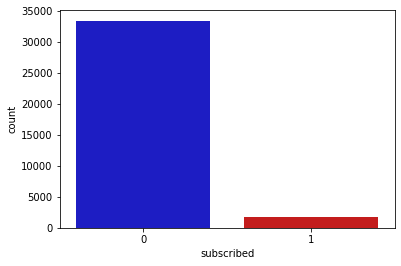

In [4]:
sns.countplot('subscribed', data=df, palette=["#0101DF", "#DF0101"])
plt.show()

# Spliting data into training and testing sets

In [5]:
x = df.join(pd.get_dummies(df['student_country'], prefix='country')).drop(columns=['student_id','student_country','subscribed']).values
y = df['subscribed'].values
display(x)
display(y)

array([[3.00e-01, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.34e+02, 0.00e+00, 5.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.00e-01, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42,stratify=y)

In [7]:
y_train.mean()

0.05098637524836787

In [8]:
y_test.mean()

0.05095089412432586

# Applying Oversampling to Minority Class & Undersampling to Majority Class

In [9]:


upsampled = resample(x_train[y_train == 1],replace=True,n_samples=5000,random_state=49)
downsampled = resample(x_train[y_train == 0],replace=True,n_samples=5000,random_state=49)

x_train_sampled = np.concatenate((upsampled,downsampled),axis=0)
x_train_sampled

array([[310.9,   0. ,   7. , ...,   0. ,   0. ,   0. ],
       [365.2,   0. ,   2. , ...,   0. ,   0. ,   0. ],
       [ 49.2,   0. ,   1. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0.9,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [10]:
y_train = np.zeros(x_train_sampled.shape[0],dtype=int)
y_train[:5000] = 1

## Feature Scaling

In [11]:
rob_scaler = RobustScaler()
rob_scaler.fit(x_train)
x_train_scaled = rob_scaler.transform(x_train_sampled)
x_test_scaled = rob_scaler.transform(x_test)

## Applying dimensionality Reduction (PCA)

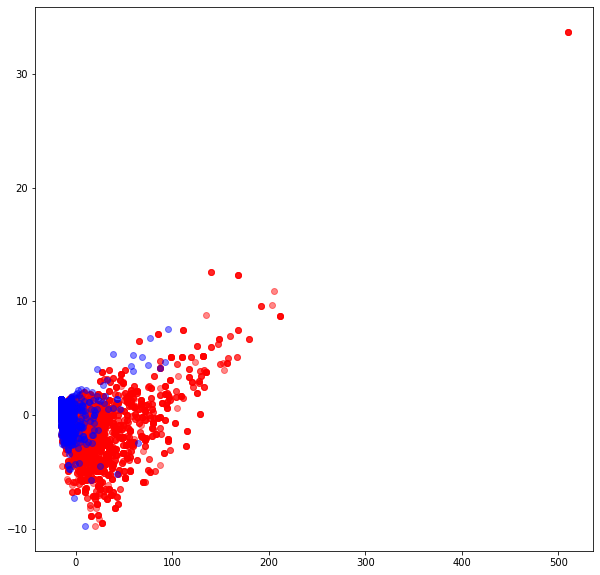

In [12]:
pca_model = PCA(n_components=2, random_state=42)
pca_model.fit(x_train_scaled)
x_train_pca = pca_model.transform(x_train_scaled)
x_test_pca = pca_model.transform(x_test_scaled)

plt.figure(figsize=(10,10)) 
plt.scatter(x_train_pca[:,0][y_train == 1],x_train_pca[:,1][y_train == 1],color='#ff000077')
plt.scatter(x_train_pca[:,0][y_train == 0],x_train_pca[:,1][y_train == 0],color='#0000ff77')
plt.show()

In [13]:
pca_model.explained_variance_ratio_.round(2)

array([0.99, 0.01])

# Model Trainig & Evaluation

Predicted,0,1
Actual,,
0,6131,556
1,104,255


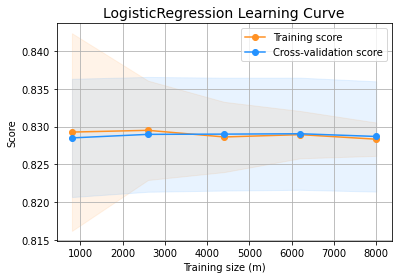

Predicted,0,1
Actual,,
0,3696,2991
1,107,252


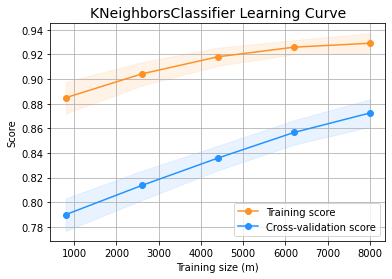

Predicted,0,1
Actual,,
0,5808,879
1,84,275


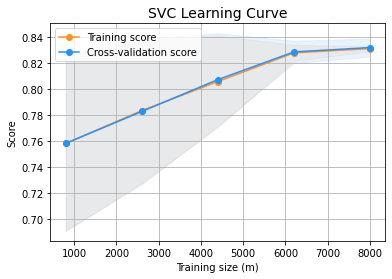

Predicted,0,1
Actual,,
0,5708,979
1,83,276


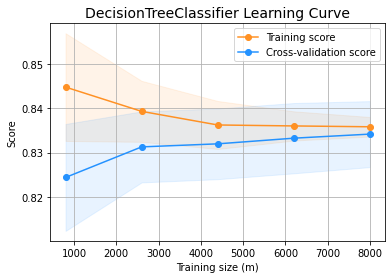

Predicted,0,1
Actual,,
0,5892,795
1,96,263


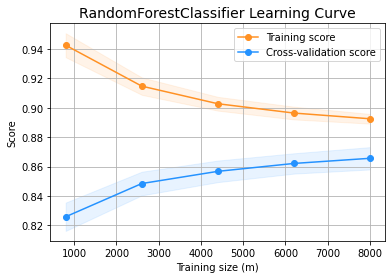

In [15]:
classifiers = {
    "LogisiticRegression":{'model':LogisticRegression(),'params':{"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}},
    "KNearest":{'model':KNeighborsClassifier(),'params':{"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}},
    "Support Vector Classifier":{'model':SVC(),'params':{'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}},
    "DecisionTreeClassifier":{'model':DecisionTreeClassifier(),'params':{"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}},
    "RandomForestClassifier":{'model':RandomForestClassifier(),'params':{'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10]}},
    
}

for key, val in classifiers.items():
    grid = GridSearchCV(val['model'],val['params'])
    grid.fit(x_train_pca, y_train)

    display(HTML(f"<h1>{key}</h1>"))
    y_pred_train = grid.best_estimator_.predict(x_train_pca)
    y_pred_test = grid.best_estimator_.predict(x_test_pca)
    display(HTML(f"<h3>accuracy : {np.round(accuracy_score(y_test,y_pred_test), 2) * 100}%</h3>"))
    display(HTML(f"<h3>precision : {np.round(precision_score(y_test,y_pred_test), 2) * 100}%</h3>"))
    display(HTML(f"<h3>recall : {np.round(recall_score(y_test,y_pred_test), 2) * 100}%</h3>"))
    display(HTML(f"<h3>f1 : {np.round(f1_score(y_test,y_pred_test), 2) * 100}%</h3>"))
    display(pd.DataFrame({'Actual':y_test,'Predicted':y_pred_test}).groupby(['Actual'])['Predicted'].value_counts().unstack(fill_value=0))
    plot_learning_curve(grid.best_estimator_, x_train_pca, y_train,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))